In [ ]:
# Apply Logistic regression for binary classification problem

In [1]:
import seaborn as sns # data visualization
import pandas as pd    # dataframes
import numpy as np

Focus on hyper parameter tunning of logistic regression
No feature engineering, No EDA (exploratory data analyis)

In [4]:
df=sns.load_dataset('iris') # iris dataset is available in sns library
df.head(10)

# will takes features(sepal and petals) to predict species

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
df['species'].unique()   # types of species--unique categories

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.isnull().sum(axis=0)
#df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
df.isnull().sum()  # check missing values in the entire dataframe

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df['species']=='setosa'

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: species, Length: 150, dtype: bool

In [12]:
df['species']!='setosa'

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [13]:
df[df['species']!='setosa'] #This line filters the DataFrame df and returns only those rows where the value in the column species is not equal to 'setosa'.
                            #t removes all rows where the species is setosa.

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df1= df[df['species']!='setosa']

In [15]:
df1.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


1. To convert categorical data into numerical form, which is required for machine learning models (since they work with numbers, not text).
2. This replaces text labels in the species column with numeric values using a mapping dictionary.

'versicolor' → becomes 0

'virginica' → becomes 1


In [16]:
df1['species']=df1['species'].map({'versicolor':0,'virginica':1})

#Be careful — you might be changing a temporary copy, not the real data.”

C:\Users\Dr. Atif Khan\AppData\Local\Temp\ipykernel_10252\1792649159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['species']=df1['species'].map({'versicolor':0,'virginica':1})


In [17]:
df1['species']

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [18]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# preparing data for machine learning modes
X = features (inputs) <br>
y = label (output)<br>
X = df.iloc[:, :-1]<br>
This selects all rows (:) and all columns except the last one (:-1).<br>
👉 It’s usually used to pick input features (independent variables).<br>
y = df.iloc[:, -1]<br>
This selects all rows (:) but only the last column (-1).<br>
👉 It’s usually used to pick the target/output variable (dependent variable).<br>

X = df.iloc[:, :-1]	Pandas DataFrame <br>
X = df.iloc[:, :-1].values	NumPy ndarray <br>

In [19]:
### Split dataset into independent and dependent features
# intger location based indexing
X=df1.iloc[:,:-1]     # return dataframe
y=df1.iloc[:,-1]

In [20]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [48]:
#df.iloc[:, -1] selects one single column by its position.

#When you select a single column (not a list of columns), Pandas automatically returns a Series — a 1D labeled array.

df.iloc[:, -1]	 #Series (1D)

#If you want y as a DataFrame instead: 
#Use double brackets:
df.iloc[:, [-1]]	#DataFrame (2D)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [23]:
type(df.iloc[:, [-1]])

pandas.core.frame.DataFrame

Import the function
train_test_split — a function from Scikit-Learn used to split your dataset into training and testing parts.

Input variables:

X → your features (inputs)

y → your target (output)

Parameters:

test_size=0.25 → means 25% of the data will be used for testing, and the remaining 75% for training.

random_state=42 → ensures reproducibility (same random split each time).

Outputs:

X_train, y_train → data used to train the model

X_test, y_test → data used to evaluate the model’s performance

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

1. GridSearchCV is a tool from Scikit-Learn used to find the best combination of hyperparameters for a model.
2. It performs exhaustive search over a grid (set) of parameters to see which combination gives the best accuracy or score.
3. Parameter dictionary: The dictionary parameter defines the search space — all the values you want GridSearchCV to try for each hyperparameter.
4. 'penalty': type of regularization to prevent overfitting
    → options: 'l1', 'l2', 'elasticnet'
   
5. 'C': inverse of regularization strength (higher C → less regularization)

6. 'max_iter': maximum number of iterations the solver will run to converge
7.  Summmary: Setting up a parameter grid for GridSearchCV to automatically test many combinations of hyperparameters and find the best model settings.

In [27]:
from sklearn.model_selection import GridSearchCV

parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}


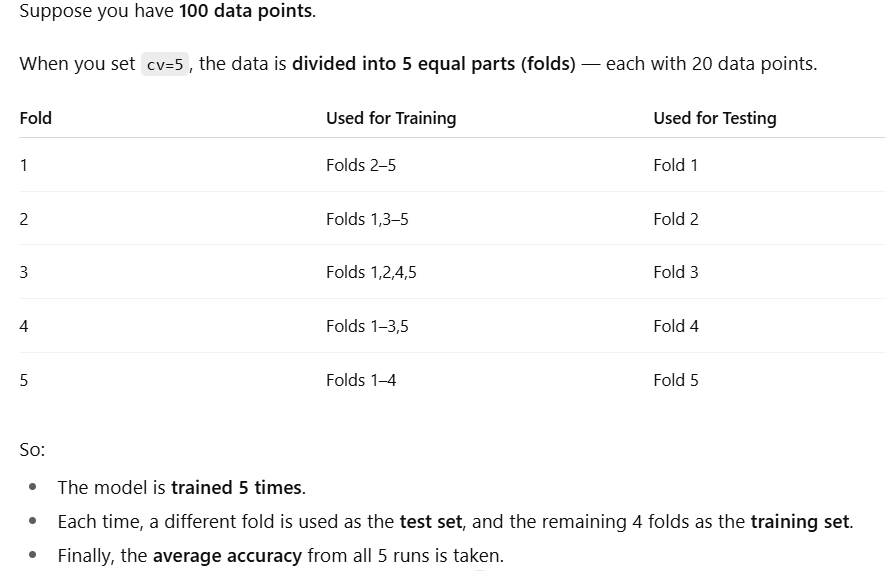
Why 5 fold- cross validation is Useful
1. cv stands for cross-validation, and cv=5 means 5-fold cross-validation.
2. Makes the result more reliable and less dependent on a single random split.
3. sHelps you know how well your model generalizes to unseen data.

# create a GridSearchCV object named classifier_regressor
# GridSearchCV object will test different combinations of hyperparameters (from your parameter dictionary) on your classifier (Logistic Regression model).
# param_grid=parameter → defines which parameters and values to try.
# scoring='accuracy' → tells GridSearchCV to evaluate models based on accuracy score (used for classification problem)
# cv=5 → uses 5-fold cross-validation, meaning the data is split into 5 parts and the model is trained/tested 5 times for more reliable results.
#

In [28]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [29]:
classifier_regressor.fit(X_train,y_train)

C:\Users\Dr. Atif Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dr. Atif Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dr. Atif Khan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [30]:

#GridSearchCV tests many different parameter combinations — for example, different values of C, penalty, and max_iter.
#After testing them all, it figures out which combination gives the highest accuracy.

print(classifier_regressor.best_params_)  #This line shows the best settings (or best combination of parameters) that your model found automatically during the GridSearchCV process.


{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


GridSearchCV tries many parameter combinations.
1.  For each combination, it performs 5 training/testing cycles (cross-validation).
2. It then averages the 5 accuracy scores for each combination.
3. Finally, best_score_ shows the highest of those average accuracies — the best model’s average accuracy across all 5 folds.

In [31]:
print(classifier_regressor.best_score_) #gives the average accuracy of the best-performing parameter combination across those 5 runs.

0.9733333333333334


In [33]:
##prediction
#This line is used to make predictions using your trained model (in this case, the best model found by GridSearchCV).
y_pred=classifier_regressor.predict(X_test)  #tells the model to predict the output (class labels) for the test data X_test.
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [35]:
## accuracy score

#accuracy_score → measures how many predictions were correct.
#classification_report → gives detailed metrics (like precision, recall, F1-score).

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
#Compares predicted labels (y_pred) with the actual labels (y_test).
#Returns the ratio of correct predictions to total predictions.
#Accuracy = (Correct Predictions ÷ Total Predictions)

score=accuracy_score(y_pred,y_test)
print(score)

0.92


In [37]:
print(classification_report(y_pred,y_test))  #prints a detailed performance report for your classification model.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [71]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1],
       [ 1, 10]], dtype=int64)

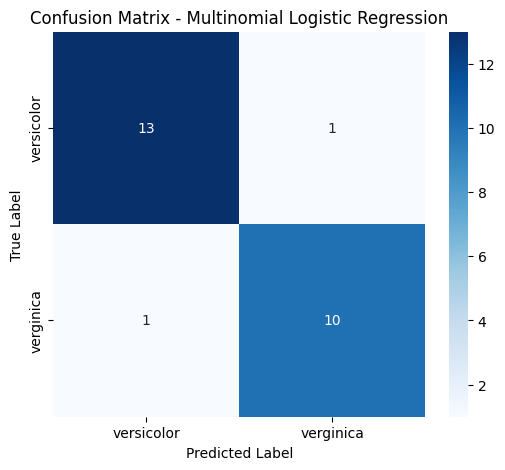

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            #xticklabels=df1['species'].unique(),
            xticklabels=['versicolor', 'verginica'],
            yticklabels=['versicolor', 'verginica'])

plt.title("Confusion Matrix -  Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1. sns.pairplot: It helps you visualize relationships between all pairs of features in the dataset,
and see how different classes (species) are distributed in relation to each other.
2. Example (Iris dataset):

It will show scatter plots of:

sepal length vs sepal width

petal length vs petal width

sepal length vs petal length, etc.

And the points will be colored by species (e.g., setosa, versicolor, virginica).

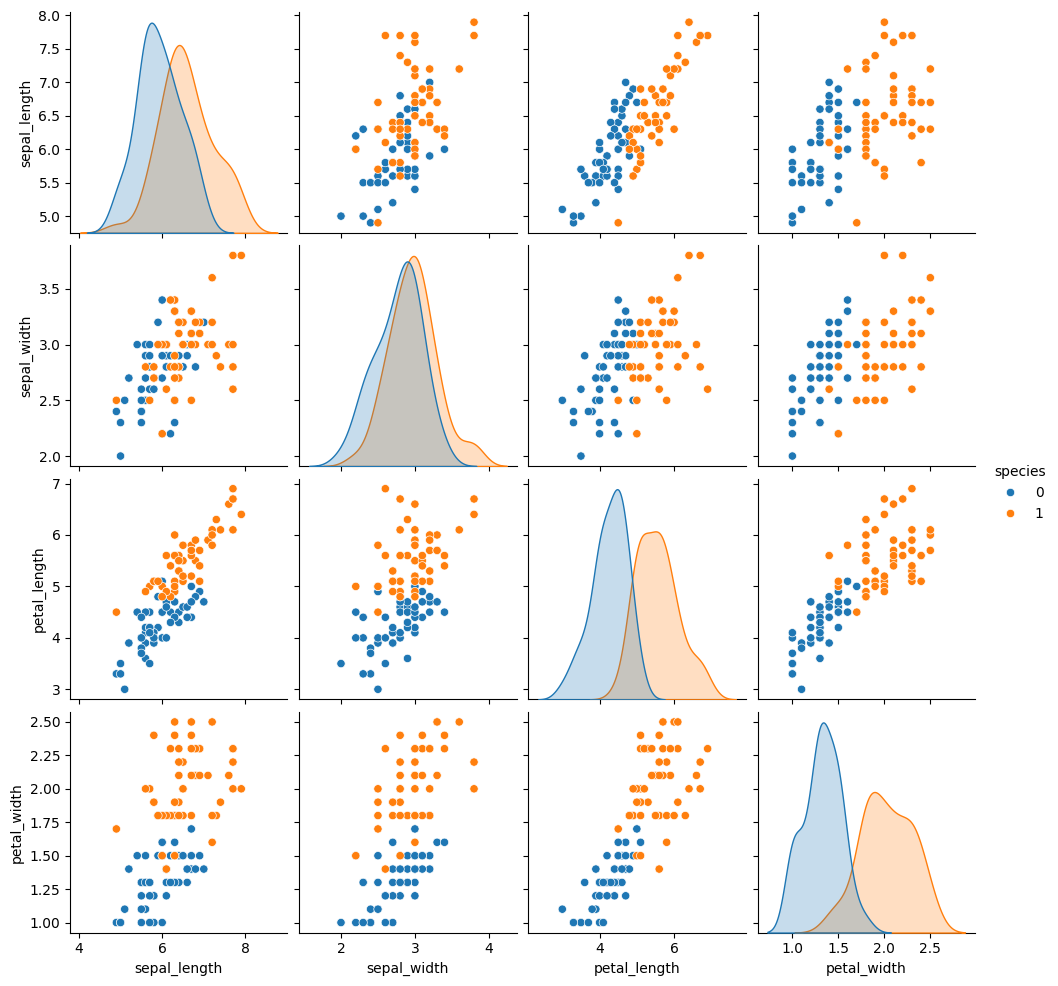

In [59]:
##EDA
sns.pairplot(df,hue='species')

1. Multicollinearity = when your features are too similar to each other, making it hard for the model to figure out which one truly matters.
2. df.corr() returns a correlation matrix — a table showing correlation values between every pair of numeric columns.
3. df.corr() → helps you understand relationships between different numerical features in your dataset.
It’s often used in data analysis to detect which variables move together or might cause multicollinearity in models.
4. If you have columns like height and weight, a correlation of 0.9 means:
   As height increases, weight also increases — strongly related.
5. 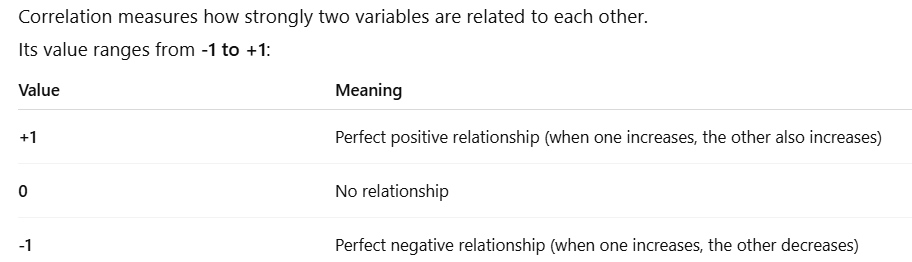


In [60]:
df.corr() #This command calculates the correlation between all numerical columns in your DataFrame df.
# accuracy is high when correlatioin is high


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
